# Self Organising Maps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Importing the dataset and creating feature vector*

In [2]:
credit_card_df = pd.read_csv('dataset/Credit_Card_Applications.csv')

In [3]:
X = credit_card_df.drop('Class', axis=1).values
y = credit_card_df['Class'].values

*Feature Scaling*

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:
X = scaler.fit_transform(X)

*Building and training the SOM using MiniSom*

In [7]:
from minisom import MiniSom

In [8]:
som = MiniSom(x=15, y=15, input_len=15, random_seed=100)

In [9]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

*Visualising the results*

In [10]:
from pylab import bone, pcolor, colorbar, plot

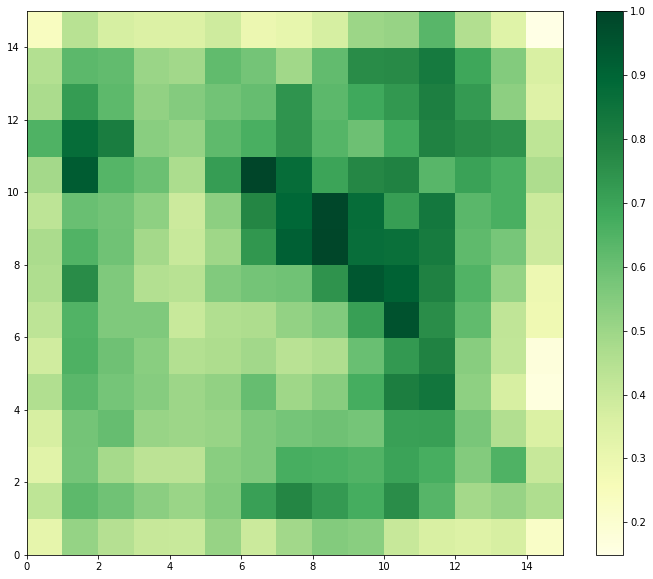

In [11]:
plt.figure(figsize=(12, 10))
bone()
pcolor(som.distance_map().T, cmap='YlGn')
colorbar()

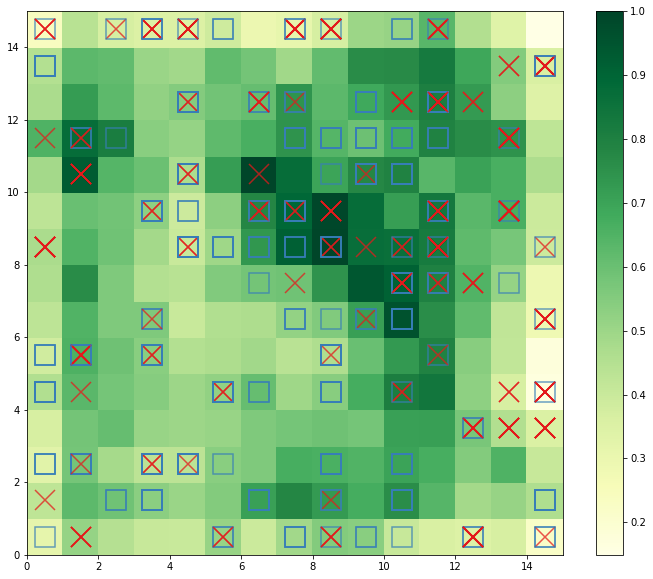

In [12]:
plt.figure(figsize=(12, 10))
bone()
pcolor(som.distance_map().T, cmap='YlGn')
colorbar()
markers = ['s', 'x']
colors = ['#377EB8', '#E41A1C']
for idx, vector in enumerate(X):
    winning_nodes = som.winner(vector)
    plot(winning_nodes[0] + 0.5, winning_nodes[1] + 0.5, markers[y[idx]], markeredgecolor=colors[y[idx]], markerfacecolor='None', markersize=20, markeredgewidth=1.5, alpha=0.75)

*Finding Frauds*

In [13]:
mappings = som.win_map(X)

In [14]:
frauds = np.concatenate([mappings[(1, 10)], mappings[(6, 10)], mappings[(8, 9)], mappings[(8, 8)]], axis=0)

In [15]:
frauds = scaler.inverse_transform(frauds)

In [16]:
frauds[:, 0:1]

array([[15788776.],
       [15767231.],
       [15762716.],
       [15768474.],
       [15771409.],
       [15814116.],
       [15645820.],
       [15757467.],
       [15815443.],
       [15748432.],
       [15696287.],
       [15698749.],
       [15762799.],
       [15716347.],
       [15765487.],
       [15754578.],
       [15657228.],
       [15776921.]])